# Jupyter notebook to see agricultural movement

### _Follows pyspark notebook `05 WB Agricultural`_

## Rice Seasons Gantt Chart

### West Bengal agricultural timeline

**Boro**<br>
Plantation: Nov - Dec & Dec - Jan<br>
Harvest: April - May

**Aman**<br>
Plantation: May - June (Broadcasting), July - mid-Aug (Transplanting)<br>
Harvest: Nov - Dec

**Aus**<br>
Plantation: April - May<br>
Harvest: July to Nov

_Source: http://drdpat.bih.nic.in/Status%20Paper%20-%2002.htm_

### Imports

In [20]:
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import geopandas as gp

import plotly.express as px
import plotly.graph_objects as go

import palettable

In [21]:
df = pd.DataFrame([
    dict(Season="Aus", Start='2019-04-01', Finish='2019-05-31', Time='Plantation'),
    dict(Season="Aus", Start='2019-07-01', Finish='2019-09-30', Time='Harvest'),
    dict(Season="Aman", Start='2019-05-01', Finish='2019-08-15', Time='Plantation'),
    dict(Season="Aman", Start='2019-11-01', Finish='2019-12-01', Time='Harvest'),
    dict(Season="Boro", Start='2019-11-01', Finish='2020-01-31', Time='Plantation'),
    dict(Season="Boro", Start='2020-04-01', Finish='2020-05-01', Time='Harvest'),
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Season", color='Time', color_discrete_map={'Plantation': 'green', 'Harvest': 'Blue'})
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up

fig.update_layout(
    autosize=False,
    width=1000,
    height=300,
)

fig.show()

# fig.write_image("Charts/Rice_Seasons_Gantt_Chart_WB.png", scale=15)

## Choropleth maps

### Aman pre-plantation

In [6]:
# read the pre-plantation figures exported from Spark notebook and produce a choropleth map
df = pd.read_csv('Results/2019/aman_pre_plantation.csv')

adm1 = gp.read_file('Administrative_Boundaries.gpkg', layer='Admin1')
adm2 = gp.read_file('Administrative_Boundaries.gpkg', layer='Admin2')

adm2_wb = adm2[adm2['L1_NAME'] == 'West Bengal']

adm2_wb['net_mvmt_pct'] = adm2_wb['L2_CODE'].map(dict(zip(df['adm2'], df['net_mvmt_pct'])))
adm2_wb['Longitude'] = adm2_wb['geometry'].centroid.x
adm2_wb['Latitude'] = adm2_wb['geometry'].centroid.y
adm2_wb['Boundary'] = adm2_wb.boundary

/home/regmi/envs/data_analysis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/regmi/envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/regmi/envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




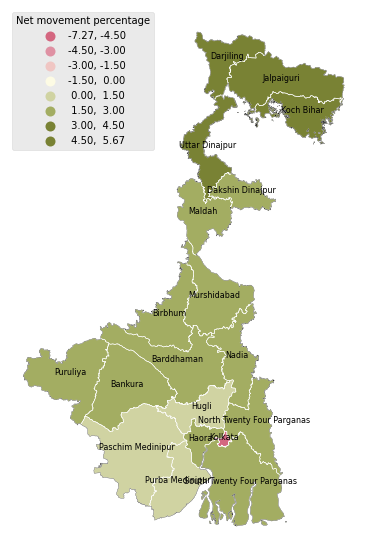

In [7]:
# plot the choropleth map and export it
cmap = ListedColormap(palettable.cartocolors.diverging.ArmyRose_7_r.mpl_colors)

markersize = 15
fontdict = {}
plt.style.use('ggplot')  # these plots use this style

ax = adm2_wb.plot(
    column='net_mvmt_pct', 
    legend=True, 
    scheme='UserDefined',
    classification_kwds={'bins': [-4.5, -3, -1.5, 0, 1.5, 3, 4.5]}, 
    legend_kwds={'title': 'Net movement percentage', 'loc': 'upper left'}, 
    cmap=cmap,
    figsize=(10, 10),
)

adm2_wb['Boundary'].plot(ax=ax, color='white', lw=0.5)
adm1.loc[[13], 'geometry'].boundary.plot(ax=ax, color='black', lw=0.25)
ax.set_axis_off()

for ind, index in enumerate(adm2_wb.index):
    ax.annotate(
        adm2_wb.loc[index, 'L2_NAME'], 
        xy=(adm2_wb.loc[index, 'Longitude'], adm2_wb.loc[index, 'Latitude']), 
        xycoords="data", 
        fontsize='8', 
        horizontalalignment='center'
    )

# plt.savefig('Charts/aman_pre_plantation_2019.png', dpi=300)

### Aman post-plantation

In [8]:
# read the pre-plantation figures exported from Spark notebook and produce a choropleth map

df = pd.read_csv('Results/2019/aman_post_plantation.csv')

adm2 = gp.read_file('Administrative_Boundaries.gpkg', layer='Admin2')

adm2_wb = adm2[adm2['L1_NAME'] == 'West Bengal']

adm2_wb['net_mvmt_pct'] = adm2_wb['L2_CODE'].map(dict(zip(df['adm2'], df['net_mvmt_pct'])))
adm2_wb['Longitude'] = adm2_wb['geometry'].centroid.x
adm2_wb['Latitude'] = adm2_wb['geometry'].centroid.y
adm2_wb['Boundary'] = adm2_wb.boundary

/home/regmi/envs/data_analysis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/regmi/envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/regmi/envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




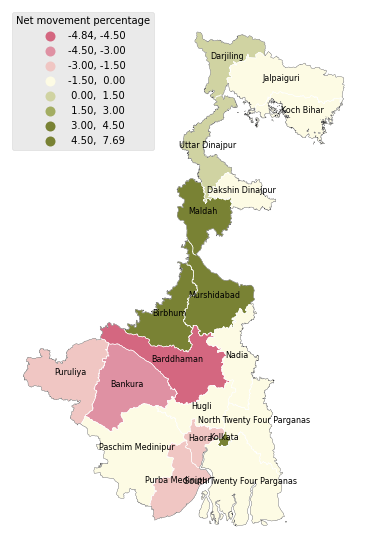

In [9]:
# plot the choropleth map and export it
cmap = ListedColormap(palettable.cartocolors.diverging.ArmyRose_7_r.mpl_colors)

markersize = 15
fontdict = {}
plt.style.use('ggplot')  # these plots use this style

ax = adm2_wb.plot(
    column='net_mvmt_pct', 
    legend=True, 
    scheme='UserDefined',
    classification_kwds={'bins': [-4.5, -3, -1.5, 0, 1.5, 3, 4.5]}, 
    legend_kwds={'title': 'Net movement percentage', 'loc': 'upper left'}, 
    cmap=cmap,
    figsize=(10, 10),
)

adm2_wb['Boundary'].plot(ax=ax, color='white', lw=0.5)
adm1.loc[[13], 'geometry'].boundary.plot(ax=ax, color='black', lw=0.25)
ax.set_axis_off()

for ind, index in enumerate(adm2_wb.index):
    ax.annotate(
        adm2_wb.loc[index, 'L2_NAME'], 
        xy=(adm2_wb.loc[index, 'Longitude'], adm2_wb.loc[index, 'Latitude']), 
        xycoords="data", 
        fontsize='8', 
        horizontalalignment='center'
    )

# plt.savefig('Charts/aman_post_plantation_2019.png', dpi=300)

## Other charts

### Synchronicity

In [10]:
# read the pre- and post- aman plantation files
pre = pd.read_csv('Results/2019/aman_pre_plantation.csv')
post = pd.read_csv('Results/2019/aman_post_plantation.csv')

# merge them into a single dataframe
pre_post = pre.merge(post[['adm2', 'net_mvmt_pct']], on='adm2', suffixes=['_pre', '_post'])

# scatter plot them against each other
fig = px.scatter(pre_post, x='net_mvmt_pct_pre', y='net_mvmt_pct_post', labels={
    'net_mvmt_pct_post': 'Net movement percentage (Post Aman plantation)',
    'net_mvmt_pct_pre': 'Net movement percentage (Pre Aman plantation)',
},
                 text='adm2_name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=600,
    width=750,
    title_text=''
)

fig.show()

# fig.write_image("Charts/Aman_plantation_synchronicity.png", scale=15)

### Rural-urban plots

In [13]:
# rural-urban population figures for West Bengal districts

text = """Bankura, 3596292 3295613 300679 8.36
Barddhaman, 7723663 4644079 3079584 39.87
Birbhum, 3502387 3054019 448368 12.80
Kolkata, 4486679 0 4486679 100.00
Darjiling, 1842034 1123859 718175 38.99
Haora, 4841638 1776970 3064668 63.30
Hugli, 5520389 3388395 2131994 38.62
Jalpaiguri, 3869675 2825001 1044674 27.00
Koch Bihar, 2822780 2533480 289300 10.25
Malda, 3997970 3446056 551914 13.80
Purba Medinipur, 5094238 4500770 593468 11.65
Paschim Medinipur, 5943300 5228308 714992 12.03
Murshidabad, 7102430 5697224 1405206 19.78
Nadia, 5168488 3730897 1437591 27.81
North 24 Parganas, 10082852 4275724 5807128 57.59
Puruliya, 2927965 2554584 373381 12.75
South 24 Parganas, 8153176 6065179 2087997 25.61
Uttar Dinajpur, 3000849 2638662 362187 12.07
Dakshin Dinajpur, 1670931 1434856 236075 14.13"""

# Source: https://www.wbhealth.gov.in/other_files/2009/Districtwise_population_of_West_Bengal_Rural_Urban_2011.pdf

In [14]:
# bringing the crude text into desirable format
df = pd.DataFrame(
    [
        [i.split(', ')[0]] + i.split(', ')[1].split() for i in text.split('\n')
    ],
    columns=['District', 'Total', 'Rural', 'Urban', 'Percentage']
)

df = df.sort_values(by=['District'])
df = df.reset_index(drop=True)

pre_post = pre_post.sort_values(by=['adm2_name'])
pre_post = pre_post.reset_index(drop=True)

pre_post['urban_pct'] = df['Percentage']

pre_post['urban_pct'] = pre_post['urban_pct'].astype(float)

#### Pre-plantation (Aman)

In [15]:
fig = px.scatter(pre_post, x='net_mvmt_pct_pre', y='urban_pct', labels={
    'urban_pct': 'Urban population percentage',
    'net_mvmt_pct_pre': 'Net movement percentage (Pre Aman plantation)',
},
                 text='adm2_name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=600,
    width=750,
    title_text=''
)

fig.show()

# fig.write_image("Charts/aman_pre_plantation_ru.png", scale=15)

#### Post plantation (Aman)

In [16]:
import plotly.express as px
fig = px.scatter(pre_post, x='net_mvmt_pct_post', y='urban_pct', labels={
    'urban_pct': 'Urban population percentage',
    'net_mvmt_pct_post': 'Net movement percentage (Post Aman plantation)',
},
                 text='adm2_name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=600,
    width=750,
    title_text=''
)

fig.show()

# fig.write_image("Charts/aman_post_plantation_ru.png", scale=15)

## Mechanization vs movement plots

In [17]:
# proprocessing the tractors data
tractors = pd.read_excel('Tractors.xlsx')

tractors.drop([0, 20, 21], inplace=True)

tractors['Share of households that ever owned a tractor since Jan 2019'] = 100 * tractors['Share of households that ever owned a tractor since Jan 2019']
tractors['Share of households that have ever farmed that ever owned a tractor since Jan 2019'] = 100 * tractors['Share of households that have ever farmed that ever owned a tractor since Jan 2019']

tractors = tractors.sort_values(by=['District'])

pre_post['tractors_1'] = tractors.iloc[:, 2].tolist()
pre_post['tractors_2'] = tractors.iloc[:, 3].tolist()

### Pre-plantation (Aman)

In [18]:
fig = px.scatter(pre_post, x='net_mvmt_pct_pre', y='tractors_1', labels={
    'tractors_1': 'Share of households that ever owned a tractor since Jan 2019 (%)',
    'net_mvmt_pct_pre': 'Net movement percentage (Pre Aman plantation)',
},
                 text='adm2_name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=600,
    width=750,
    title_text=''
)

fig.show()

# fig.write_image("Charts/aman_pre_plantation_tractor.png", scale=15)

### Post plantation (Aman)

In [19]:
import plotly.express as px
fig = px.scatter(pre_post, x='net_mvmt_pct_post', y='tractors_1', labels={
    'tractors_1': 'Share of households that ever owned a tractor since Jan 2019 (%)',
    'net_mvmt_pct_post': 'Net movement percentage (Post Aman plantation)',
},
                 text='adm2_name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=600,
    width=750,
    title_text=''
)

fig.show()

# fig.write_image("Charts/aman_post_plantation_tractor.png", scale=15)